In [1]:
# We are creating a dataset which is based on all of the dual-task trials per block and we are ignoring the practice trials
# The dataset is built by merging the results acquired in the paper created by Chris (---link---)

# Some columns are based on the significance provided in the said paper ( & maybe image here)
# The csv files we are merging into our dataset are provided below

# -MaxDeviationPerTrial.csv
# -maxnrDigitEnteredPerPPAndPerBlockPerTrial.csv
# -numberOfVisitsTrackerPerParticipantPerBlock.csv (trial data)
# samplesOutsideTrial.csv(*)
# sdVisTime.csv(*)
# tableForMeanTimeInDigitPerPPandPerBlock.csv(*) - merge the data ber block maybe?

# We are using the payoff function values provided in the meanVisTime.csv file
# The columns marked with star could be significant and we are testing to see the results with or without the said feature

In [1]:
# We first read the data and display it
final_rows = []

import pandas as pd
data = pd.read_csv('./data.csv');

display('loaded data!')

'loaded data!'

In [52]:
# We first split the data into 8 datasets
# and we calculate the mean value for each of the dataset
# in order to see how biased the data is in terms of 
# Radius, Noise and the payoff function

split_on = ['PayOffFunctionNumeric','Radius','Noise']

def split(dataSets,col):
    
    s = []
    
    for data in dataSets:
        
        if(col >= len(split_on)):
            return None
        
        values = {}
        
        for row in range(0,data.shape[ 0 ]):
            splitColumn = split_on[ col ]

            rowValue = data.iloc[ row ][ splitColumn ]
            
            if not rowValue in values:
                values[ rowValue ] = [ ]
                
            values[ rowValue ].append(row)
            
        for value in values:
            
            nextSet = []
            
            for row in values[value]:
                nextSet.append(data.iloc[ row ])
                
            s.append(pd.DataFrame(nextSet))
            
        
    res = split( s , col + 1 )
    
    if res is None:
        return s
    else: 
        return res
    
sets = [ data ]

split_sets = split(sets,0)

print('resulting length : ' +  str(len(split_sets)))


resulting length : 8
240


In [3]:
#We then take the top N percent of each of the sets

def get_by_split(sets,start, step, end, func):
    
    while start <= end:
        
        for dataSet in sets:
            
            sorted_set = dataSet.sort_values('Score',ascending=[False])
            func(start,sorted_set)
            
        start = start + step

per_tick = {}

#we save all of the datasets in this variable for later use
datasets = []

#We then compute the mean for the score column for the provided dataset
def mean(current_tick,item):

    meanVal = item['Score'].mean()
    
    if current_tick not in per_tick:
        per_tick[current_tick]= []
        
    per_tick[current_tick].append(meanVal)
    datasets.append(item)

get_by_split(split_sets, 1, 0.05, 1,mean)

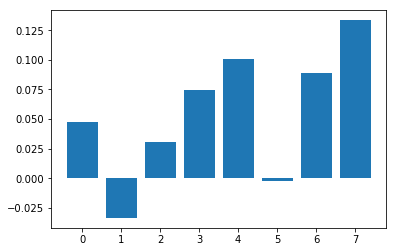

In [4]:
# We can now measure the distributions
# by testing different sizes

import matplotlib.pyplot as plt
import numpy as np

for tick_size in per_tick:
    tick_marks = np.arange(len(per_tick[tick_size]))
    fig, ax = plt.subplots()
    plt.bar(tick_marks,per_tick[tick_size])
    plt.show()

In [68]:
dictionary = {}

i = 0;
perc = 10

while(i <= 9):    

    
    #Here might be some missing one from rounding,
    #TODO: check if it's correct
    conc = pd.DataFrame()

    
    for dataSet in datasets:
        
        #24
        size = int(dataSet.shape[0] / perc)
        
        #starting point
        take = i * size
        
        next_items = dataSet[take:take+size]
        
            
    dictionary[ i ] = conc
    i = i + 1
    
frames = []

for key in dictionary:
    df = pd.DataFrame(dictionary[key])
    print(df.shape)
    

     Unnamed: 0  SubjectNr  TrialNumber  Block  PayOffFunctionNumeric  Radius  \
648       649.0      109.0        115.0    2.0                    1.0    80.0   
657       658.0      109.0        124.0    4.0                    1.0    80.0   
644       645.0      109.0        111.0    1.0                    1.0    80.0   
647       648.0      109.0        114.0    2.0                    1.0    80.0   
651       652.0      109.0        118.0    3.0                    1.0    80.0   
744       745.0      110.0         21.0    1.0                    1.0    80.0   
654       655.0      109.0        121.0    3.0                    1.0    80.0   
133       134.0      102.0         60.0    3.0                    1.0    80.0   
746       747.0      110.0         23.0    2.0                    1.0    80.0   
749       750.0      110.0         26.0    2.0                    1.0    80.0   
658       659.0      109.0        125.0    4.0                    1.0    80.0   
643       644.0      109.0  

In [29]:
# Then we split the data into training and testing sets by using the train test split function
from sklearn.model_selection import train_test_split

# Percentage of 
test = 0.25

y = data[ 'Score' ]
X = data.drop( 'Score',1 )

#We split the data in train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=test)

display('X shape : ' + str(X_train.shape))
display('Y shape : ' + str(y_train.shape))

display('Finished train test split')

'X shape : (1440, 12)'

'Y shape : (1440,)'

'Finished train test split'

In [12]:
from sklearn.svm import SVR
from sklearn.tree import tree

# here be les dragons
sv = SVR()
tr = tree.DecisionTreeRegressor()

print('Initialized algorithms')

Initialized algorithms


In [34]:
# Using grid search CV to tweak parameters
# We define a hyper parameter

from sklearn.model_selection import GridSearchCV

dict_grid = {
    sv: [
            {
                'C': [1, 10, 100, 1000], 
                'kernel' : ['linear']
            },
            {
                'C': [1, 10, 100, 1000], 
                'gamma': [0.001, 0.0001], 
                'kernel': ['rbf']
            }
    ],
    tr : [
            {
                #TODO:...
            }
    ]
}

In [11]:
from sklearn.svm import SVR
from sklearn import tree

from sklearn.utils import shuffle

algorithms = [sv,tr]
scores = ['r2']

print('...shuffling ...')

X_shuff = shuffle( X_train )

print( '...finished shuffling... ' )

for score in scores:
    
    display("# Tuning hyper-parameters for %s" % score)
    
    for algorithm in algorithms:
        
        display( '-------- Starting a new grid search CV fitting with model --------' )
        display( 'Fitting with model : ' + str(algorithm) )
        
        clf = GridSearchCV(algorithm, dict_grid[algorithm], scoring = '%s' % score)
        clf.fit( X_train, y_train )
        
display('Finished training')

NameError: name 'sv' is not defined